# Scan aerosols 
=========================


- Sylvie Dagoret-Campagne
- Affiliation LAL-IN2P3-CNRS
- Work : LSST & StarDice
- date December 4th 2017


In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import os
import re 

In [3]:
import astropy.units as u

In [4]:
from scipy.interpolate import interp1d

In [5]:
import sys
sys.path.append('../libradtransim')

In [6]:
import libsimulateTranspLSSTScattAbsAer as atm

In [7]:
#help(atm)

In [8]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

*** Ozone absorption is removed to understand ***

In [9]:
#def ApplyAerosols(wl,tr,thelambda0,tau0,alpha0):
#    """
#     ApplyAerosols(wl,tr,thelambda0,tau0,alpha0)
#     
#     - input :
#     -- wl np array of wavelength in nm
#     -- tr transparency array without aerosols
#     -- thelambda0 : the reference point where to have tau0 in nm
#     -- tau0 is the extinction at thelambda0
#     -- alpha0 the Angstrom exponent
#     
#    """
#    #extinc_aer=tau0*(thelambda0/wl)**alpha0
#    extinc_aer=tau0*np.power(wl/thelambda0,-alpha0)
#    tr_aer=np.exp(-extinc_aer)
#    tr_tot=tr*tr_aer
#    return tr_tot

## atmosphere without aerosols

In [10]:
beta_aerosol=np.linspace(0.,0.5,10)
lambda0_aerosol=900. # nm
airmass=1.
pwv=4.0     # mm
ozone=0. # DU
alpha=1.0 # angstrom coefficients

In [11]:
path,thefile=atm.ProcessSimulation(airmass,pwv,ozone) 
fullfilename=os.path.join(path,thefile)
atm_data=np.loadtxt(fullfilename)
wl_atm0=atm_data[:,0]
tr_atm0=atm_data[:,1]  


--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0.INP')
('Output to file                : ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0.OUT')
('uvspec cmd: ', '/Users/dagoret//MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0.INP > simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0.OUT')


## Atmosphere with variation of $\beta$

$$
\tau = \beta (\lambda/ \lambda_0)^\alpha
$$

In [12]:
all_wl_atm= []
all_tr_atm= []

for beta in beta_aerosol:
      wl_atm=wl_atm0
      tr_atm=atm.ApplyAerosols(wl_atm0,tr_atm0,lambda0_aerosol,beta,alpha)
      all_wl_atm.append(wl_atm) 
      all_tr_atm.append(tr_atm) 

### bind together wavelength and transmission

In [13]:
wl_and_tr_atm=zip(all_wl_atm,all_tr_atm)  

## plot air-transmission

### In linear scale

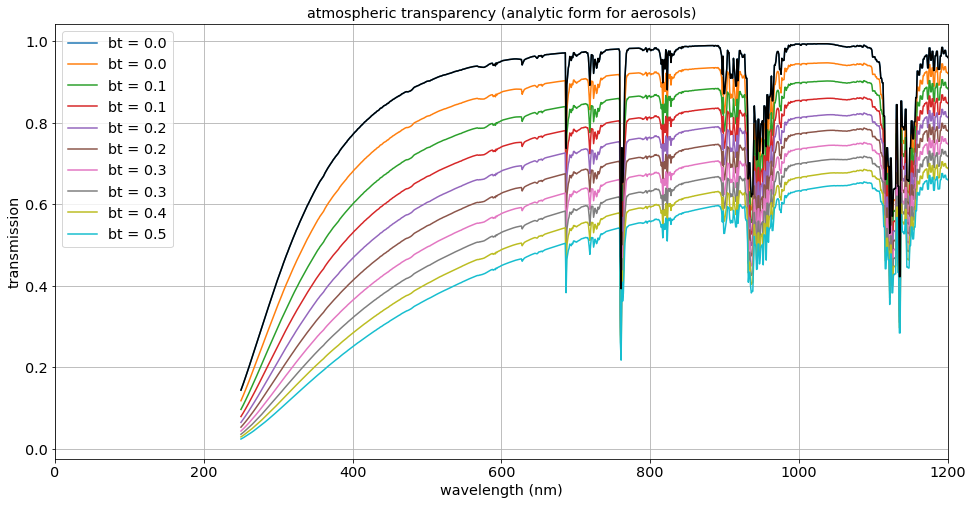

In [14]:
idx=0
for wl_atm,tr_atm in wl_and_tr_atm:
    thelabel="bt = {}".format(int(beta_aerosol[idx]*10)/10.)
    plt.plot(wl_atm,tr_atm,label=thelabel)
    idx+=1
plt.plot(wl_atm0,tr_atm0,'k')
plt.grid()
plt.title("atmospheric transparency (analytic form for aerosols)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.legend(loc=2)
plt.xlim(0.,1200.)
plt.savefig("atm-aer-transm-anal-beta-lin.png")

### in log scale

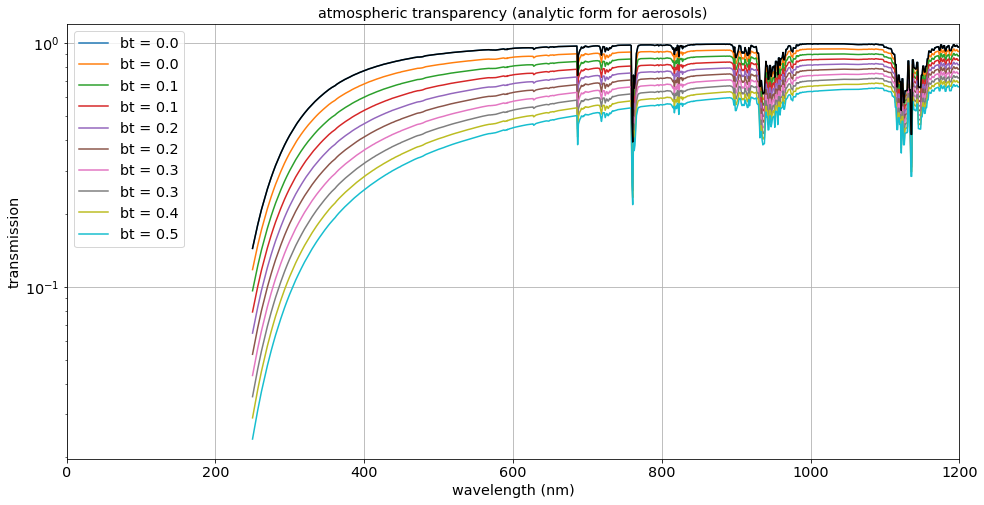

In [15]:
idx=0
for wl_atm,tr_atm in wl_and_tr_atm:
    thelabel="bt = {}".format(int(beta_aerosol[idx]*10)/10.)
    plt.semilogy(wl_atm,tr_atm,label=thelabel)
    idx+=1
plt.semilogy(wl_atm0,tr_atm0,'k')
plt.grid()
plt.title("atmospheric transparency (analytic form for aerosols)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.legend(loc=2)
plt.xlim(0.,1200.)
plt.savefig("atm-aer-transm-anal-beta-log.png")

### Plot ratio transparency with aerosols/transparency witout aerosols


- for $\beta$ variation

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


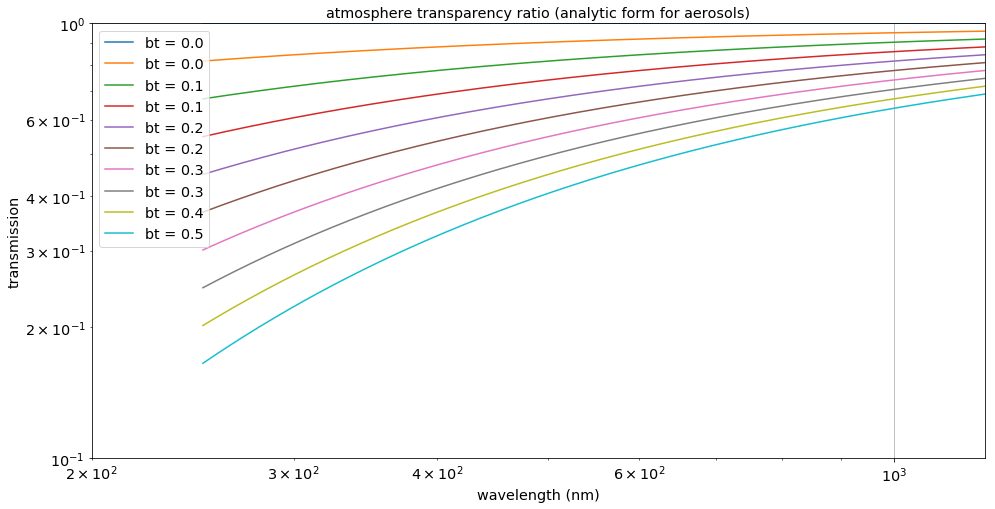

In [16]:
idx=0
for wl_atm,tr_atm in wl_and_tr_atm:
    thelabel="bt = {}".format(int(beta_aerosol[idx]*10)/10.)
    plt.loglog(wl_atm,tr_atm/tr_atm0,label=thelabel)
    idx+=1
plt.grid()
plt.title("atmosphere transparency ratio (analytic form for aerosols)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.legend(loc=2)
plt.xlim(200.,1200.)
plt.ylim(0.1,1.)
plt.savefig("atm-aer-transm-ratio-anal-beta-log.png")

## Variation of Angstrom coefficient $\alpha$

In [17]:
alpha_aerosol=np.linspace(0.,3.,10)
lambda0_aerosol=900. # nm
airmass=1.
pwv=4.0     # mm
ozone=0. # DU
beta=0.05 # angstrom coefficients

In [18]:
all_wl_atm= []
all_tr_atm= []

for alpha in alpha_aerosol:
      wl_atm=wl_atm0
      tr_atm=atm.ApplyAerosols(wl_atm0,tr_atm0,lambda0_aerosol,beta,alpha)
      all_wl_atm.append(wl_atm) 
      all_tr_atm.append(tr_atm) 

### Linear Scale

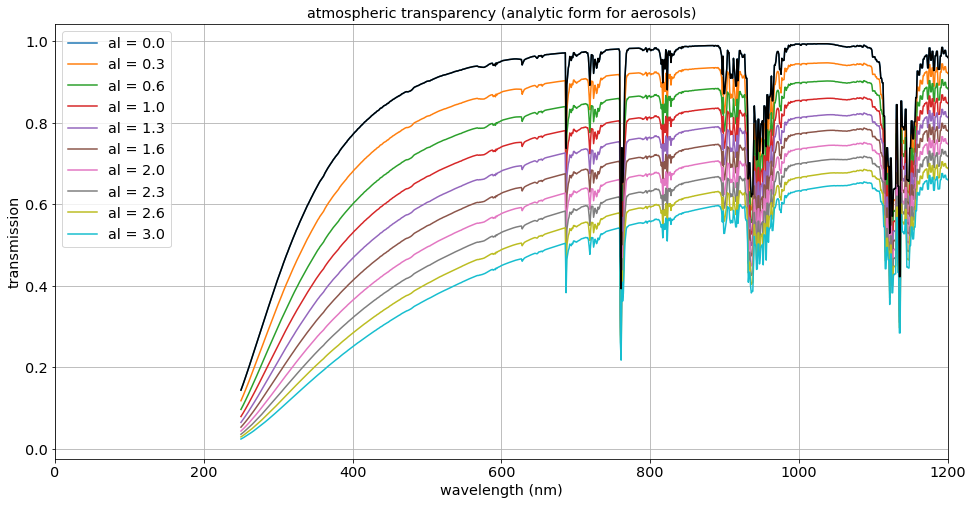

In [19]:
idx=0
for wl_atm,tr_atm in wl_and_tr_atm:
    thelabel="al = {}".format(int(alpha_aerosol[idx]*10)/10.)
    plt.plot(wl_atm,tr_atm,label=thelabel)
    idx+=1
plt.plot(wl_atm0,tr_atm0,'k')
plt.grid()
plt.title("atmospheric transparency (analytic form for aerosols)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.xlim(0.,1200.)
plt.legend(loc=2)
plt.savefig("atm-aer-transm-anal-alpha-lin.png")

### log scale

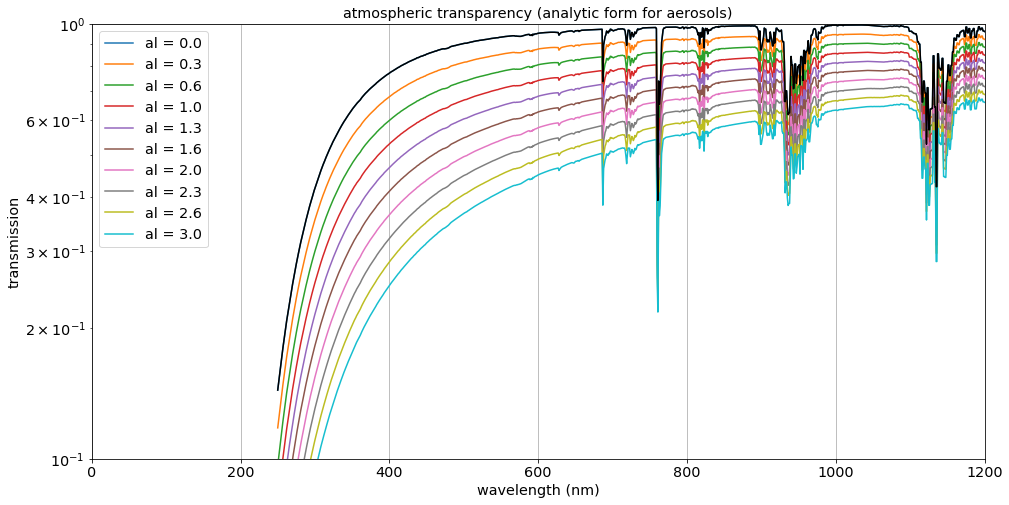

In [20]:
idx=0
for wl_atm,tr_atm in wl_and_tr_atm:
    thelabel="al = {}".format(int(alpha_aerosol[idx]*10)/10.)
    plt.semilogy(wl_atm,tr_atm,label=thelabel)
    idx+=1
plt.semilogy(wl_atm0,tr_atm0,'k')
plt.grid()
plt.title("atmospheric transparency (analytic form for aerosols)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.ylim(0.1,1.)
plt.xlim(0.,1200.)
plt.legend(loc=2)
plt.savefig("atm-aer-transm-anal-alpha-log.png")

### Ratio

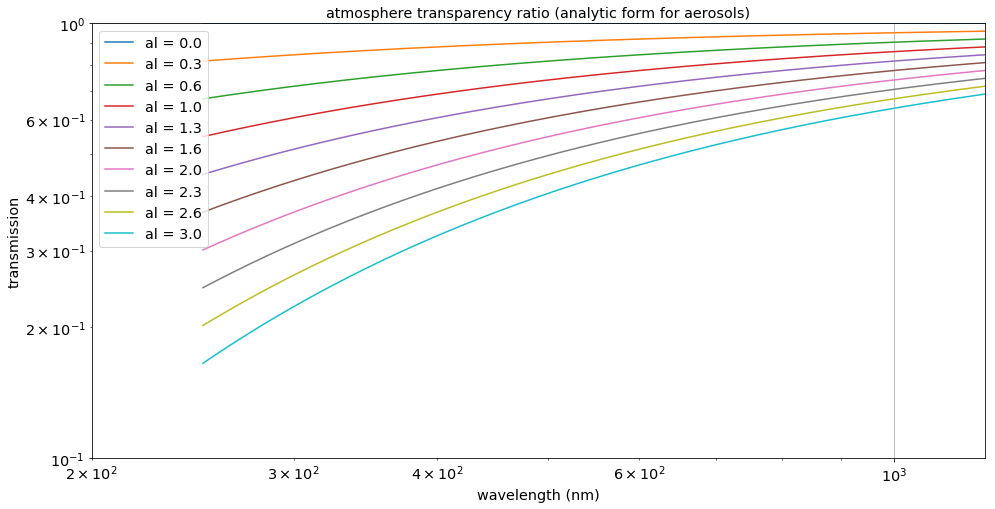

In [21]:
idx=0
for wl_atm,tr_atm in wl_and_tr_atm:
    thelabel="al = {}".format(int(alpha_aerosol[idx]*10)/10.)
    plt.loglog(wl_atm,tr_atm/tr_atm0,label=thelabel)
    idx+=1
plt.grid()
plt.title("atmosphere transparency ratio (analytic form for aerosols)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.xlim(200.,1200.)
plt.legend(loc=2)
plt.ylim(0.1,1.)
plt.savefig("atm-aer-transm-ratio-anal-alpha-log.png")